In [9]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers  import Dense, Flatten
from keras.optimizers import SGD

import matplotlib.pyplot as plt

from keras.layers import Conv2D, Dropout, MaxPooling2D, Input
from keras.datasets import fashion_mnist, mnist
import tensorflow as tf

from keras import backend
backend.set_image_data_format("channels_last")

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

n_classes = y_train.shape[1]

# Convert from integers to floats
x_train = np.float32(x_train)
x_test = np.float32(x_test)

# Normalize within [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Define model
model = Sequential()

input_shape = x_test.shape[1:]
model.add(Input(shape=input_shape))
model.add(Conv2D(8, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D())
# Add a flatten layer
model.add(Flatten())
# Add a dense layer with 32 neurons and sigmoid activation
model.add(Dense(32, activation="sigmoid"))
# Add a dense layer with n_classes neurons and softmax activiation
model.add(Dense(n_classes, activation="softmax"))

# Train for x epoch
epochs = 10

# Defines how many samples we should batch into one calculation of the gradient
batch_size = 100

# Compile the model with either "adam" or "sgd" optimizer
model.compile(optimizer="adam", 
             loss="categorical_crossentropy", 
             metrics=["accuracy"])

# Summary of model
model.summary()

# Fit the model
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
)

# summarize_diagnostics(history, epochs)





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1352)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                43296     
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

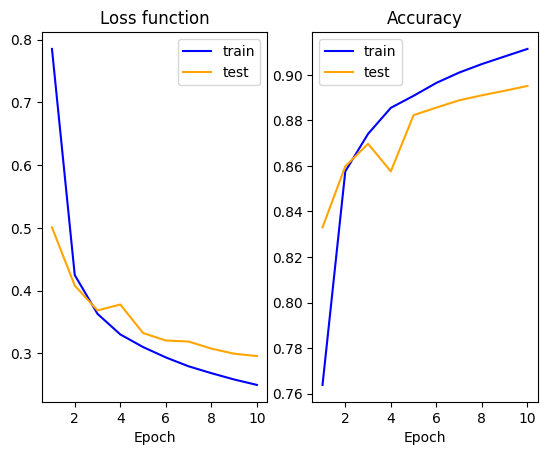

In [10]:
def summarize_diagnostics(history, epochs):
    e = range(1, epochs+1)
    plt.subplot(121)
    plt.plot(e, history.history['loss'], color='blue', label='train')
    plt.plot(e, history.history['val_loss'], color='orange', label='test')
    plt.title('Loss function')
    plt.xlabel('Epoch')
    plt.legend()
    plt.subplot(122)
    plt.plot(e, history.history['accuracy'], color='blue', label='train')
    plt.plot(e, history.history['val_accuracy'], color='orange', label='test')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

summarize_diagnostics(history, epochs)